In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import warnings
warnings.simplefilter("ignore")

In [45]:
df1 = pd.read_csv("1990-1999.csv")
df2 = pd.read_csv("2000-2012.csv")
df3 = pd.read_csv("2012-2014.csv")
df4 = pd.read_csv("2015-2016.csv")
df5 = pd.read_csv("2017onwards.csv")


In [46]:
df5

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
173919,2024-02,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,62 years 03 months,800000.0
173920,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,62 years 10 months,935000.0
173921,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62 years 11 months,908000.0
173922,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years,800000.0


In [47]:
# Extract the numeric part of 'remaining_lease', split by space, and convert to integer
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')

# Display the updated 'remaining_lease' column
print(df5['remaining_lease'])

0         61
1         60
2         62
3         62
4         62
          ..
173919    62
173920    62
173921    62
173922    63
173923    62
Name: remaining_lease, Length: 173924, dtype: int64


In [48]:
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [49]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
920122,2024-02,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,800000.0,62.0
920123,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62.0
920124,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,908000.0,62.0
920125,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,800000.0,63.0


In [50]:
# Split 'month' into 'year' and 'month' columns
df_combined[['year', 'month']] = df_combined['month'].str.split('-', expand=True)

# Convert 'year' and 'month' columns to numeric types if needed
df_combined['year'] = pd.to_numeric(df_combined['year'])
df_combined['month'] = pd.to_numeric(df_combined['month'])

In [51]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
920122,2,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,800000.0,62.0,2024
920123,2,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62.0,2024
920124,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,908000.0,62.0,2024
920125,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,800000.0,63.0,2024


In [52]:
# Calculate remaining lease for rows with NaN values
df_combined['remaining_lease'].fillna(99 - (df_combined['year'] - df_combined['lease_commence_date']), inplace=True)

In [53]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
920122,2,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,800000.0,62.0,2024
920123,2,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62.0,2024
920124,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,908000.0,62.0,2024
920125,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,800000.0,63.0,2024


In [54]:
df_combined['flat_model'] = df_combined['flat_model'].str.upper()

In [55]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
920122,2,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,APARTMENT,1987,800000.0,62.0,2024
920123,2,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,MAISONETTE,1987,935000.0,62.0,2024
920124,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,908000.0,62.0,2024
920125,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,MAISONETTE,1988,800000.0,63.0,2024


In [56]:
# Convert 'flat_type' values to lowercase
df_combined['flat_type'] = df_combined['flat_type'].str.lower()

# Standardize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi-generation': 'multi generation'
}

df_combined['flat_type'] = df_combined['flat_type'].map(type_mapping)

# Changing the case to Uppercase
df_combined['flat_type'] = df_combined['flat_type'].str.upper()

In [57]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
920122,2,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,APARTMENT,1987,800000.0,62.0,2024
920123,2,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,MAISONETTE,1987,935000.0,62.0,2024
920124,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,908000.0,62.0,2024
920125,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,MAISONETTE,1988,800000.0,63.0,2024


In [58]:
mask = df_combined['remaining_lease']>99

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]


In [59]:
# Drop rows where the 'storey_range' column contains specific values
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']

# Create a boolean mask to identify rows containing any of the specified values
mask = df_combined['storey_range'].isin(values_to_drop)

# Use the boolean mask to drop rows
df_combined = df_combined[~mask]

In [60]:
# Split the 'storey_range' into lower and upper bounds
df_combined[['lower_bound', 'upper_bound']] = df_combined['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df_combined['lower_bound'] = pd.to_numeric(df_combined['lower_bound'])
df_combined['upper_bound'] = pd.to_numeric(df_combined['upper_bound'])

In [61]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920122,2,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,APARTMENT,1987,800000.0,62.0,2024,7,9
920123,2,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,MAISONETTE,1987,935000.0,62.0,2024,7,9
920124,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,908000.0,62.0,2024,4,6
920125,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,MAISONETTE,1988,800000.0,63.0,2024,1,3


In [62]:
# Adding a new column 'price_per_sqm'
df_combined['price_per_sqm'] = df_combined['resale_price'] / df_combined['floor_area_sqm']

# Adding a new column 'years_holding'
df_combined['years_holding'] = df_combined['year'] - df_combined['lease_commence_date']

# Adding a new column 'current_remaining_lease'
df_combined['current_remaining_lease'] = df_combined['remaining_lease'] - (2024 - df_combined['year'])

In [63]:
df_combined

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920122,2,YISHUN,EXECUTIVE,614,YISHUN ST 61,07 TO 09,142.0,APARTMENT,1987,800000.0,62.0,2024,7,9,5633.802817,37,62.0
920123,2,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,MAISONETTE,1987,935000.0,62.0,2024,7,9,6404.109589,37,62.0
920124,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,MAISONETTE,1988,908000.0,62.0,2024,4,6,6219.178082,36,62.0
920125,2,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,146.0,MAISONETTE,1988,800000.0,63.0,2024,1,3,5479.452055,36,63.0


In [64]:
# Saving the clean dataset to a file
df_combined = df_combined.reset_index(drop=True)
df_combined.to_csv('Singapore_resale_updated.csv', index=False)

In [65]:
# Reading the dataset
df = pd.read_csv('Singapore_resale_updated.csv')

In [66]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913238 entries, 0 to 913237
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    913238 non-null  int64  
 1   town                     913238 non-null  object 
 2   flat_type                913238 non-null  object 
 3   block                    913238 non-null  object 
 4   street_name              913238 non-null  object 
 5   storey_range             913238 non-null  object 
 6   floor_area_sqm           913238 non-null  float64
 7   flat_model               913238 non-null  object 
 8   lease_commence_date      913238 non-null  int64  
 9   resale_price             913238 non-null  float64
 10  remaining_lease          913238 non-null  float64
 11  year                     913238 non-null  int64  
 12  lower_bound              913238 non-null  int64  
 13  upper_bound              913238 non-null  int64  
 14  pric

In [67]:
# Display summary statistics of numerical columns
df.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease
count,913238.000000,913238.000000,913238.000000,9.132380e+05,913238.000000,913238.000000,913238.000000,913238.000000,913238.000000,913238.000000,913238.000000
mean,6.588652,95.682068,1988.189615,3.176184e+05,81.099464,2005.988010,6.682723,8.682723,3283.032122,17.798394,63.087473
std,3.423837,25.844577,10.589169,1.685320e+05,10.720794,9.244338,4.811592,4.811592,1507.335073,10.646404,10.537052
min,1.000000,28.000000,1966.000000,5.000000e+03,41.000000,1990.000000,1.000000,3.000000,161.290323,0.000000,40.000000
25%,4.000000,73.000000,1981.000000,1.910000e+05,74.000000,1998.000000,4.000000,6.000000,2283.582090,9.000000,56.000000
50%,7.000000,93.000000,1986.000000,2.940000e+05,83.000000,2005.000000,7.000000,9.000000,2928.571429,16.000000,61.000000
75%,10.000000,113.000000,1996.000000,4.130000e+05,90.000000,2013.000000,10.000000,12.000000,4145.454545,25.000000,71.000000
max,12.000000,307.000000,2022.000000,1.568888e+06,99.000000,2024.000000,49.000000,51.000000,15170.838710,58.000000,97.000000


In [68]:
# Display the first few rows of the dataset
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0


In [69]:
# Check for missing value
df.isnull().sum() 

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
year                       0
lower_bound                0
upper_bound                0
price_per_sqm              0
years_holding              0
current_remaining_lease    0
dtype: int64

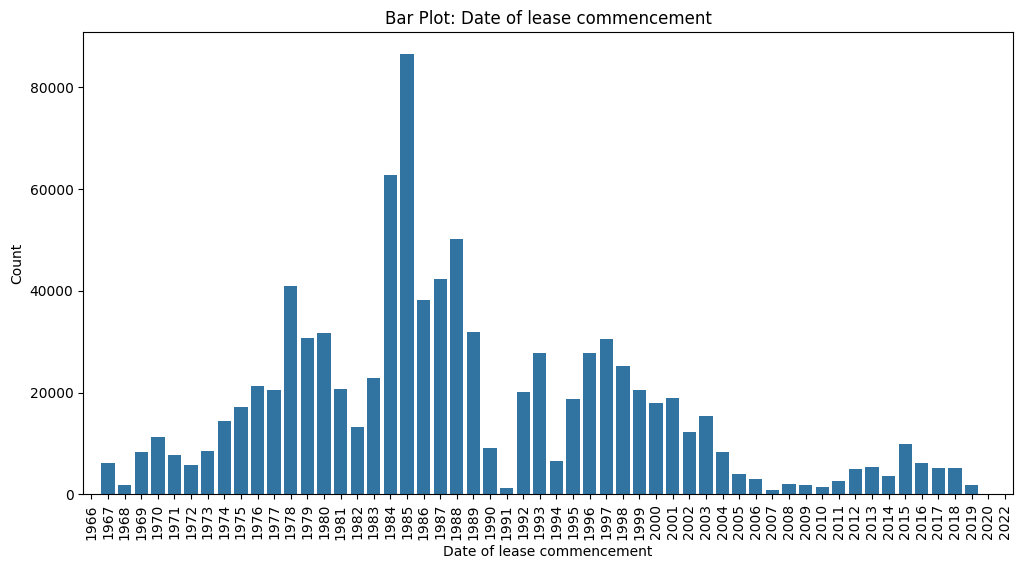

In [70]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df)
plt.title('Bar Plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

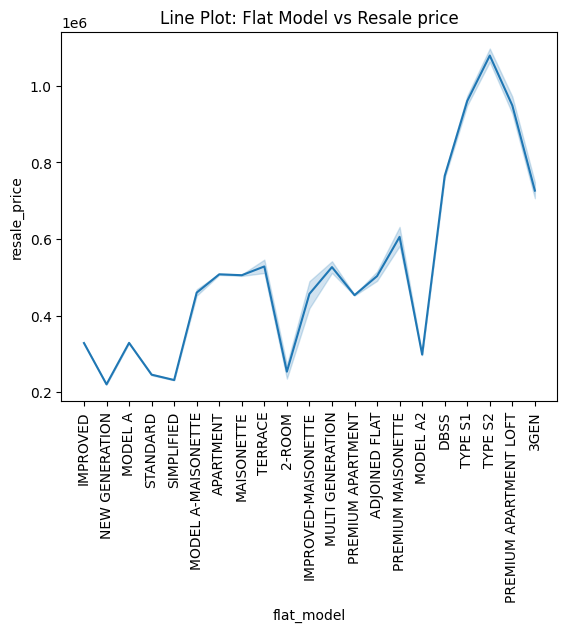

In [71]:
# Line plot
sns.lineplot(x='flat_model', y='resale_price', data=df)
plt.title('Line Plot: Flat Model vs Resale price')
plt.xticks(rotation=90)
plt.show()

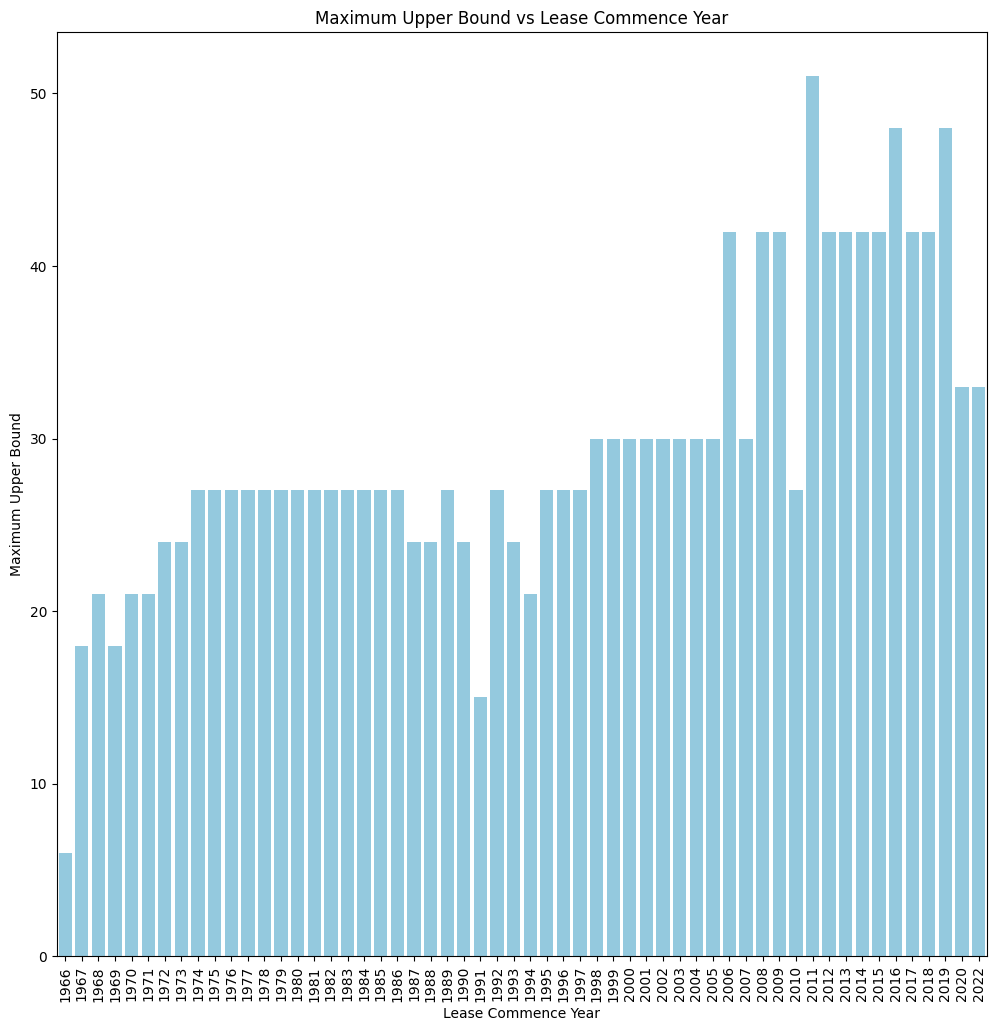

In [72]:
plt.figure(figsize=(12, 12))

# Group by lease_commence_year and find the maximum value of upper_bound for each group
max_upper_bound = df.groupby('lease_commence_date')['upper_bound'].max().reset_index()

# Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound, color='skyblue')

# Set plot labels and title
plt.title('Maximum Upper Bound vs Lease Commence Year')
plt.xlabel('Lease Commence Year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [73]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
df1 = df[selected_columns]

# Separate features (X) and target variable (y)
X = df1.drop('resale_price', axis=1)
y = df1['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
df1

,year,town,flat_type,flat_model,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,current_remaining_lease,years_holding,resale_price
0,1990,ANG MO KIO,1 ROOM,IMPROVED,10 TO 12,31.0,1977,86.0,52.0,13,9000.0
1,1990,ANG MO KIO,1 ROOM,IMPROVED,04 TO 06,31.0,1977,86.0,52.0,13,6000.0
2,1990,ANG MO KIO,1 ROOM,IMPROVED,10 TO 12,31.0,1977,86.0,52.0,13,8000.0
3,1990,ANG MO KIO,1 ROOM,IMPROVED,07 TO 09,31.0,1977,86.0,52.0,13,6000.0
4,1990,ANG MO KIO,3 ROOM,NEW GENERATION,04 TO 06,73.0,1976,85.0,51.0,14,47200.0
...,...,...,...,...,...,...,...,...,...,...,...
913233,2024,YISHUN,EXECUTIVE,APARTMENT,07 TO 09,142.0,1987,62.0,62.0,37,800000.0
913234,2024,YISHUN,EXECUTIVE,MAISONETTE,07 TO 09,146.0,1987,62.0,62.0,37,935000.0
913235,2024,YISHUN,EXECUTIVE,MAISONETTE,04 TO 06,146.0,1988,62.0,62.0,36,908000.0
913236,2024,YISHUN,EXECUTIVE,MAISONETTE,01 TO 03,146.0,1988,63.0,63.0,36,800000.0


In [75]:
df1.isna().sum()

year                       0
town                       0
flat_type                  0
flat_model                 0
storey_range               0
floor_area_sqm             0
lease_commence_date        0
remaining_lease            0
current_remaining_lease    0
years_holding              0
resale_price               0
dtype: int64

In [76]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date','current_remaining_lease', 'years_holding', 'resale_price']
df1 = df[selected_columns]

# Separate features (X) and target variable (y)
X = df1.drop('resale_price', axis=1)
y = df1['resale_price']

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['town']])
X1 = ohe.fit_transform(X[['town']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['flat_type']])
X2 = ohe2.fit_transform(X[['flat_type']]).toarray()
ohe3 = OneHotEncoder(handle_unknown='ignore')
ohe3.fit(X[['flat_model']])
X3 = ohe3.fit_transform(X[['flat_model']]).toarray()
ohe4 = OneHotEncoder(handle_unknown='ignore')
ohe4.fit(X[['storey_range']])
X4 = ohe4.fit_transform(X[['storey_range']]).toarray()
# independent features after encoding
X = np.concatenate((X[['year','floor_area_sqm','lease_commence_date','years_holding','current_remaining_lease']].values, X1, X2, X3, X4), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(639266, 77)
(273972, 77)
(639266,)
(273972,)


In [78]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)
print(Lr.score(X_train, y_train))
print(Lr.score(X_test,y_test))

0.8380303917968573
0.837715645256422


In [79]:
y_pred = Lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

51876.795243512366
4594720765.069783
67784.3696221318
0.837715645256422


In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50,random_state = 42)
rf.fit(X_train, y_train)

# Print R-squared scores
print( rf.score(X_train, y_train))
print( rf.score(X_test, y_test))

0.9904260722959832
0.9742436232224


In [81]:
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

18651.779951337267
729234554.988321
27004.34326156296
0.9742436232224


In [82]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
print(DTR.score(X_train, y_train))
print(DTR.score(X_test,y_test))

0.992197696621825
0.9650479953415422


In [83]:
y_pred = DTR.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

20959.193091608882
989588317.6094462
31457.72270221489
0.9650479953415422


In [84]:
#(X[['year','floor_area_sqm','lease_commence_date','years_holding','current_remaining_lease']].values, X1, X2, X3, X4)
new_sample = np.array([[1990, 50.0,1966,13,50.0,'ANG MO KIO','1 ROOM','IMPROVED','10 TO 12']])
new_sample_town = ohe.transform(new_sample[:, [5]]).toarray()
new_sample_flat_type = ohe2.transform(new_sample[:, [6]]).toarray()
new_sample_flat_model = ohe3.transform(new_sample[:, [7]]).toarray()
new_sample_storey_range = ohe4.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4]],new_sample_town,new_sample_flat_type,new_sample_flat_model,new_sample_storey_range ), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = DTR.predict(new_sample1)
print('Predicted selling price:',new_pred)

Predicted selling price: [8200.]


In [85]:
import pickle
with open('model_DTR.pkl','wb') as file:
    pickle.dump(DTR,file)
with open('scaler_DTR.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('ohe.pkl','wb') as file:
    pickle.dump(ohe,file)
with open('ohe2.pkl','wb') as file:
    pickle.dump(ohe2,file)
with open('ohe3.pkl','wb') as file:
    pickle.dump(ohe3,file)
with open('ohe4.pkl','wb') as file:
    pickle.dump(ohe4,file)
